# Laboratorio 1

Universidad Galileo
Algoritmos en la Ciencia de Datos

**Rodrigo Rafael Chang Papa**

**Carné: 19000625**

## Carga de librerías

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Funciones generales para evaluar polinomios

In [3]:
# Función para obtener una cadena de texto con la expresión matemática
# a ser evaluada por Python
def genFormula(equat):
    equat = equat.replace(' ', '')
    spliter = re.split("([\+|\-])", equat)
    #spliter = re.split("((\d*)(x)\^*\d*)+([\+|\-])*([\+|\-]\d*)", equat)
    #print(spliter)
    out = ""
    for w in spliter:
        try:
            if(('x' in w) and len(w) >= 2): #Extramos monomios.
                varPos = w.index('x')
                w = w[:varPos] + "*" +  w[varPos:]
                w = w.replace('^', '**')
                out = out +  '(' + w + ')'
            elif(('x' not in w)): #Extraemos numeros sin variable.
                out = out +  w       
        except:
            pass
    #print(out)
    return out

# Función para evaluar la cadena str_equ con el valor valX
def evaluate_Fx(str_equ, valX):
    strOut = genFormula(str_equ)
    #print(strOut)
    x = valX
    out = eval(strOut)
    return out

# Función para aproximar una derivada por diferencias finitas
def evaluate_derivate_fx(str_equ, x, h):
    strOut = genFormula(str_equ)
    strOut = strOut.replace("x", '(x + h)')
    strOut = "-4*(" + strOut + ")"
    out = eval(strOut)

    strOut = genFormula(str_equ)
    strOut = strOut.replace("x", '(x + 2*h)')
    out = out + eval(strOut)

    strOut = genFormula(str_equ)
    strOut = strOut.replace("x", '(x)')
    strOut = "3*(" + strOut + ")"
    out = out + eval(strOut)

    out = -out/(2*h)

    return out

## Algoritmo de bisección

In [47]:
# Método de bisección con límites a y b
# hasta N iteraciones como máximo
def biseccionSolverX(f_str, a, b, N=1000, eps=1e-6):
    
    # Obtenemos una función evaluable
    f = lambda x : evaluate_Fx(f_str, x)
    
    if f(a)*f(b) >= 0:
        print("No es posible aplicar el método de bisección.")
        return None
    
    # Se inicializan los límites
    a_n = a
    b_n = b
    
    # Listas para guardar iteradores
    arrayIters = []
    arrayXn = []
    arrayF_x = []
    arrayErr = []
    
    # Se inician las iteraciones
    for n in range(1, N+1):
        
        # Se obtiene punto medio y se evalua
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        # Si hay cambio de signo en el primer segmento:
        if abs(f_m_n) < eps:
            print("Se encontró solución.")
            break
        elif f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        # Si hay cambio de signo en el segundo segmento:
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            continue
            
        # Guardar resultados
        arrayIters.append(n)
        arrayXn.append(m_n)
        arrayErr.append(abs(f_m_n))
        arrayF_x.append(f_m_n)

    # Termina algoritmo
    print("Algoritmo terminado...")
    solution = [n, m_n, abs(f_m_n)]
    
    # Crear un dataframe con los resultados
    TableOut = pd.DataFrame({'Iter':arrayIters, 'Xn':arrayXn, 'Error': arrayErr, 'F(x)':arrayF_x})
    return TableOut, solution

## Ejemplo de utilización

In [48]:
#-3x^4+5x^3-4x^2-12x
#16x^3-4

# Obtener la función y el valor inicial
ecuacion = input("Ingrese función: ")
a = float(input("Valor inicial a: "))
b = float(input("Valor inicial b: "))

# Ejecutar el algoritmo de Newton
tableOut, soluc = biseccionSolverX(ecuacion, a, b, N=25, eps=1e-6)

Ingrese función: 1x^2-1x-1
Valor inicial a: 1
Valor inicial b: 2
Se encontró solución.
Algoritmo terminado...


In [49]:
# Mostrar la tabla de resultados
print(tableOut)

    Iter        Xn     Error      F(x)
0      1  1.500000  0.250000 -0.250000
1      2  1.750000  0.312500  0.312500
2      3  1.625000  0.015625  0.015625
3      4  1.562500  0.121094 -0.121094
4      5  1.593750  0.053711 -0.053711
5      6  1.609375  0.019287 -0.019287
6      7  1.617188  0.001892 -0.001892
7      8  1.621094  0.006851  0.006851
8      9  1.619141  0.002476  0.002476
9     10  1.618164  0.000291  0.000291
10    11  1.617676  0.000801 -0.000801
11    12  1.617920  0.000255 -0.000255
12    13  1.618042  0.000018  0.000018
13    14  1.617981  0.000119 -0.000119
14    15  1.618011  0.000050 -0.000050
15    16  1.618027  0.000016 -0.000016


In [50]:
# Mostrar la solución
print("Solución: ", soluc[1])

Solución:  1.6180343627929688


***
## Encontrar la tasa de convergencia

In [59]:
# Valor límite de sucesión
x_star = soluc[2]

# Obtener los errores en k y los errores en k+1
err = np.abs(tableOut['Xn'].values - x_star)
e_k = err[:-1]
e_k_1 = err[1:]
err

array([0.49999994, 0.74999994, 0.62499994, 0.68749994, 0.65624994,
       0.64062494, 0.63281244, 0.62890619, 0.63085932, 0.62988276,
       0.63037104, 0.6301269 , 0.63000483, 0.62994379, 0.62997431,
       0.62995905, 0.62996668, 0.62996287, 0.62996096, 0.62996001,
       0.62996048, 0.62996024, 0.62996036, 0.62996042, 0.62996045])

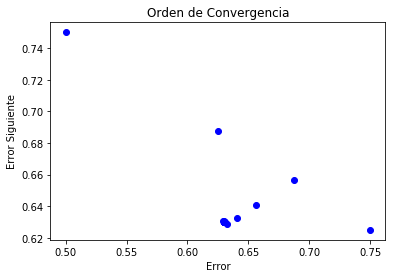

In [60]:
plt.plot(e_k, e_k_1, 'bo')
plt.title("Orden de Convergencia")
plt.xlabel("Error")
plt.ylabel("Error Siguiente")
plt.show()

In [61]:
# Efectuamos una regresión lineal en logaritmos
# para estimar la tasa de convergencia
modelo = LinearRegression()  
modelo.fit(np.log(e_k).reshape(-1, 1), 
           np.log(e_k_1).reshape(-1, 1))

# Obtenemos la tasa de convergencia y la constante
# a partir de los coeficientes del modelo
r = modelo.coef_
C = np.exp(modelo.intercept_)
print("Tasa de convergencia r=%0.2f con constante C=%0.2f" % (r, C))

Tasa de convergencia r=-0.42 con constante C=0.53


***
## Ejercicio 3 - problema de optimización

In [57]:
# Minimizar 4x^4-4x+1
# Por lo tanto, queremos resolver 16x^3-4 = 0
# Utilizamos nuestra función de Newton:

tableOut, soluc = biseccionSolverX("16x^3-4", 0, 1, eps=1e-7)

Se encontró solución.
Algoritmo terminado...


In [58]:
# Mostrar la tabla de resultados
print(tableOut)

    Iter        Xn         Error          F(x)
0      1  0.500000  2.000000e+00 -2.000000e+00
1      2  0.750000  2.750000e+00  2.750000e+00
2      3  0.625000  9.375000e-02 -9.375000e-02
3      4  0.687500  1.199219e+00  1.199219e+00
4      5  0.656250  5.219727e-01  5.219727e-01
5      6  0.640625  2.066040e-01  2.066040e-01
6      7  0.632812  5.457306e-02  5.457306e-02
7      8  0.628906  2.004910e-02 -2.004910e-02
8      9  0.630859  1.714647e-02  1.714647e-02
9     10  0.629883  1.480147e-03 -1.480147e-03
10    11  0.630371  7.825946e-03  7.825946e-03
11    12  0.630127  3.171097e-03  3.171097e-03
12    13  0.630005  8.450242e-04  8.450242e-04
13    14  0.629944  3.176742e-04 -3.176742e-04
14    15  0.629974  2.636468e-04  2.636468e-04
15    16  0.629959  2.702072e-05 -2.702072e-05
16    17  0.629967  1.183113e-04  1.183113e-04
17    18  0.629963  4.564485e-05  4.564485e-05
18    19  0.629961  9.311953e-06  9.311953e-06
19    20  0.629960  8.854411e-06 -8.854411e-06
20    21  0.6

In [56]:
# Mostrar la solución
print("Solución: ", soluc[1])

Solución:  0.6299605220556259


Esta solución corresponde a un mínimo global, porque la función $g$ es estrictamente convexa. Por lo tanto, al haber encontrado un punto estacionario en la función, tenemos las condiciones necesarias y suficientes para clasificar a este punto estacionario como un minimizador **global**.